In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

In [168]:
# Import data
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df.head(5)

,Athlete_ID,Name,Age,Sex,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [169]:
df = df.rename(columns={'Sex': 'Gender'})
df.head(5)

,Athlete_ID,Name,Age,Gender,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [170]:
# Define the medal colors
color_scale = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

In [171]:
# define a function to update the plot based on the dropdown values
def filter_data(df, gender, country=None, sport=None):
    if gender != 'All':
        filtered_df = filtered_df[filtered_df['Gender'] == gender]
    if country != 'All':
        filtered_df = filtered_df[filtered_df['Country_Name'] == country]
    if sport != 'All':
        filtered_df = filtered_df[filtered_df['Sport'] == sport]

In [172]:
# Define the dropdown menus
gender_dropdown = widgets.Dropdown(
    options=['Both', 'M', 'F'],
    value='Both',
    description='Gender:')

sports = ["ALL"] + df['Sport'].unique().tolist()
sports.sort()
sport_dropdown = widgets.Dropdown(options=sports, value="ALL", description="Sport:")

countries = ["ALL"] + df['Country_Name'].unique().tolist()
countries.sort()
country_dropdown = widgets.Dropdown(options=countries, value="ALL", description='Country:')

In [173]:
# filter out rows where no medal was received
filtered_df = filtered_df[~(filtered_df['Medal'] == 'na')]

In [174]:
# Create dropdowns
gender_dropdown = widgets.Dropdown(options=['All'] + list(df['Gender'].unique()), description='Gender')
country_dropdown = widgets.Dropdown(options=['All'] + list(df['Country_Name'].unique()), description='Country')
sport_dropdown = widgets.Dropdown(options=['All'] + list(df['Sport'].unique()), description='Sport')

In [175]:
# Define the callback functions
def on_gender_change(change):
    update_scatter_plot(change.new, gender_dropdown.value)
    
def on_sport_change(change):
    update_scatter_plot(change.new, sport_dropdown.value)
    
def on_country_change(change):
    update_scatter_plot(change.new, country_dropdown.value)

In [176]:
# create a pivot table to count medals by age and medal type
medal_counts = pd.pivot_table(filtered_df, index=['Age'], columns='Medal', values='Name', aggfunc='count', fill_value=0)

Text(0, 0.5, 'Medal Count')

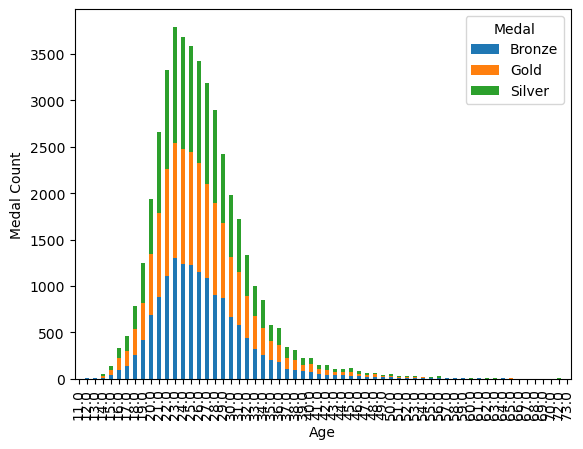

In [177]:
# create stacked bar chart
medal_counts.plot(kind='bar', stacked=True)

# set x and y axis labels
plt.xlabel('Age')
plt.ylabel('Medal Count')

In [178]:
# Register the callback functions
gender_dropdown.observe(on_gender_change, names='value')
sport_dropdown.observe(on_sport_change, names='value')
country_dropdown.observe(on_country_change, names='value')

In [180]:
# Display the dropdown menus
display(gender_dropdown)
display(sport_dropdown)
display(country_dropdown)

Dropdown(description='Gender', index=2, options=('All', 'M', 'F'), value='F')

Dropdown(description='Sport', index=12, options=('All', 'Cycling Road', 'Shooting', 'Swimming', 'Basketball', …

Dropdown(description='Country', options=('All', ' Hungary', ' Poland', ' Switzerland', ' Yugoslavia', ' United…

In [181]:
# plot dropdowns
update_plot(gender_dropdown.value, sport_dropdown.value, country_dropdown.value)